<a href="https://colab.research.google.com/github/Nikiel54/MNIST-simple-neural-net/blob/main/MNIST_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from keras import datasets
import matplotlib.pyplot as plt
import math

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


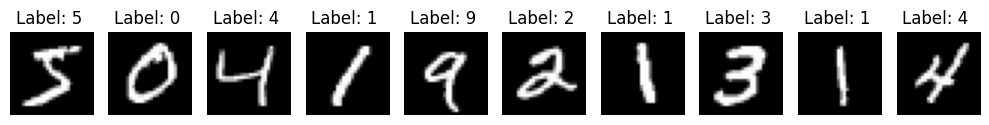

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]} ")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
## standardize data:
x_train = x_train / 255
x_test = x_test / 255


In [7]:
## Activation Functions
def sigmoid(x, deriv=False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def ReLU(x, deriv=False):
  if deriv == True:
    return np.maximum(0, x)
  else:
    return (x > 0).astype(float)

In [16]:
def learning(input, output, iterations):
    ## set random seed
    np.random.seed(2)

    ## set weights with mean = 0
    W1 = np.random.rand(784, 28) - 0.5
    W2 = np.random.rand(28, 10) - 0.5

    for i in range(iterations):
        ##forward prop
        l0 = input
        A1 = np.dot(input.T, W1) # 1x28 matrix
        l1 = ReLU(A1, deriv=False)

        A2 = np.dot(l1, W2) # 1x10 matrix
        l2 = sigmoid(A2, deriv=False).T


        ## how much is the error?
        l2_err = (output - l2)

        ## tracking error
        if i % 2000 == 0:
            print("Error: " + str(np.mean(np.abs(l2_err))))

        ## back prop
        W2_delta = l2_err * sigmoid(l2, deriv=True)

        ## how much did each l1 val contribute to l2 error?
        W1_error = W2_delta.T.dot(W2.T)

        ## in what direction is the target l1?
        W1_delta = W1_error * ReLU(l1, deriv=True)


        ## update weights
        W2 += np.dot(l1.T, W2_delta.T)
        W1 += np.dot(l0, W1_delta)

    ## visibly see digit prediction
    print(f"\nProbability predictions for the digits: \n{l2}\n")

    ## determine if prediction is correct
    predicted_val = (l2[np.argmax(l2)])[0]
    target_val = (output[np.argmax(output)])[0]

    ## set tolerance
    tolerance = 0.005

    ## check if prediction is correct
    if math.isclose(predicted_val, target_val, rel_tol=tolerance):
        s = f"Predicted output: {np.argmax(l2)}\nCorrect Prediction!"
        print(s)
        return None
    else:
        s = f"Predicted output: {np.argmax(l2)}\nWrong Prediction..."
        print(s)
        return None



In [17]:
## test for specific images
i = 0

## set input and outputs
input = (x_train[i]).reshape(784, 1)
target_num = y_train[i]

print(f"Target number: {target_num}\n")
print("Let's track the error:")
target = np.array([[0],
                [0],
                [0],
                [0],
                [0],
                [0],
                [0],
                [0],
                [0],
                [0]])
target[target_num] = 1


## call neural network learning on the image
learning(input, target, iterations=10000)


## Optional code for calculating overall accuracy.
  #correct += learning(input, target, iterations=10000)
  #if i % 10 == 0:
    #accuracy = correct / total_count * 100
    #print(f"Correct: {accuracy}%")


#Accuracy = correct / total_count * 100
#print(f"Final Accuracy: {Accuracy}")


Target number: 5

Let's track the error:
Error: 0.5097906334806226
Error: 0.008027410203771793
Error: 0.005651461607720118
Error: 0.004605347635163389
Error: 0.003983651948164063

Probability predictions for the digits: 
[[0.00356001]
 [0.00356058]
 [0.00356039]
 [0.0035607 ]
 [0.00356066]
 [0.99644038]
 [0.00356044]
 [0.00356039]
 [0.00356063]
 [0.00356048]]

Predicted output: 5
Correct Prediction!


In [18]:
!git config --global user.langenikiel@gmail.com "your_email@example.com"
!git config --global user.Nikiel54 "your_username"

# Replace YOUR_USERNAME and REPO_NAME with actual values
!git clone https://github.com/Nikiel54/MNIST-simple-neural-net.git

Cloning into 'MNIST-simple-neural-net'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [35]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#!cp "/content/drive/Colab_Notebooks/MNIST_testing.ipynb" "/Colab Notebooks/MNIST-simple-neural-net/"

cp: cannot stat 'r/content/drive/Colab_Notebooks/MNIST_testing.ipynb': No such file or directory
